In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
folder = "20180928-resnet164_v2"

In [21]:
df = pd.DataFrame()
p = re.compile(r'[\w\d_]*-traindata-(\d*)-\[(.*)\].csv')
for f in os.listdir(os.path.abspath(folder)):
    print(f)
    m = p.match(f)
    if m is not None:
        a = []
        print(m.group(2))
        input_params = m.group(2).split('-')
        a.insert(0,m.group(1))
        a += input_params
        a.append(f)
        df = pd.concat([df, pd.DataFrame([a])],axis=0)
#print(df)

resnet164_v20-30-0.144305-0.949167-0.886200.params
resnet164_v20-40-0.004995-0.999716-0.925000.params
resnet164_v20-params-1-[200-0.1-0.0001-60-0.1-0.0028-1.0-0.9278].params
resnet164_v20-traindata-1-[200-0.1-0.0001-60-0.1-0.0028-1.0-0.9278].csv
200-0.1-0.0001-60-0.1-0.0028-1.0-0.9278
resnet164_v21-30-0.106280-0.962143-0.881400.params
resnet164_v21-40-0.008132-0.999134-0.916800.params
resnet164_v20-20-0.182579-0.935177-0.863800.params
resnet164_v21-20-0.145117-0.948987-0.870800.params
resnet164_v20-10-0.291438-0.898438-0.851400.params
resnet164_v21-10-0.290912-0.898640-0.832800.params
resnet164_v21-50-0.002782-0.999845-0.915800.params
resnet164_v20-49-0.002776-1.000000-0.927800.params


In [22]:
df.columns=['batch_size', 'epoch', 'learning_rate', 'wd', 'lr_period', 'lr_decay', 
            'train_loss', 'train_acc', 'valid_acc','filename']

In [23]:
df = df.sort_values('valid_acc', ascending=False).reset_index(drop=True)
df.iloc[:,:-1]

,batch_size,epoch,learning_rate,wd,lr_period,lr_decay,train_loss,train_acc,valid_acc
0,1,200,0.1,0.0001,60,0.1,0.0028,1.0,0.9278


resnet164_v20-traindata-1-[200-0.1-0.0001-60-0.1-0.0028-1.0-0.9278].csv


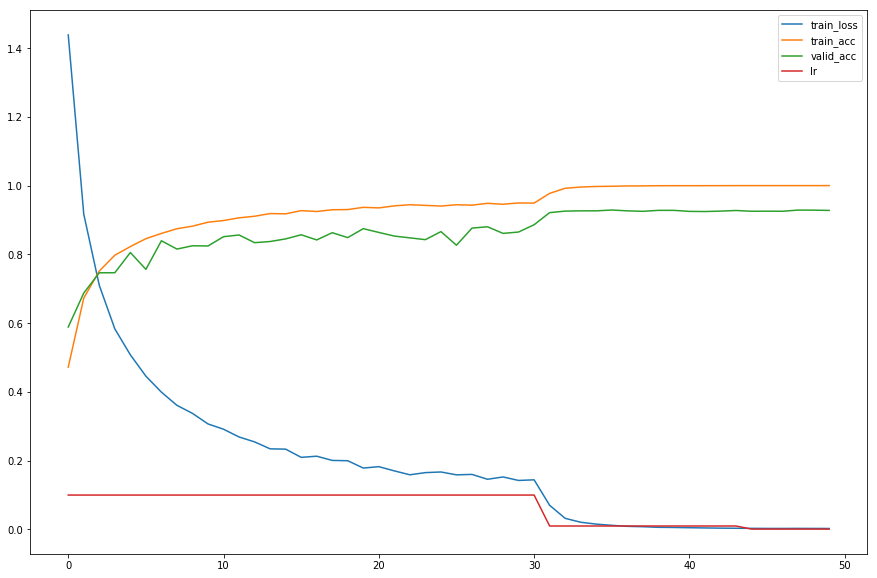

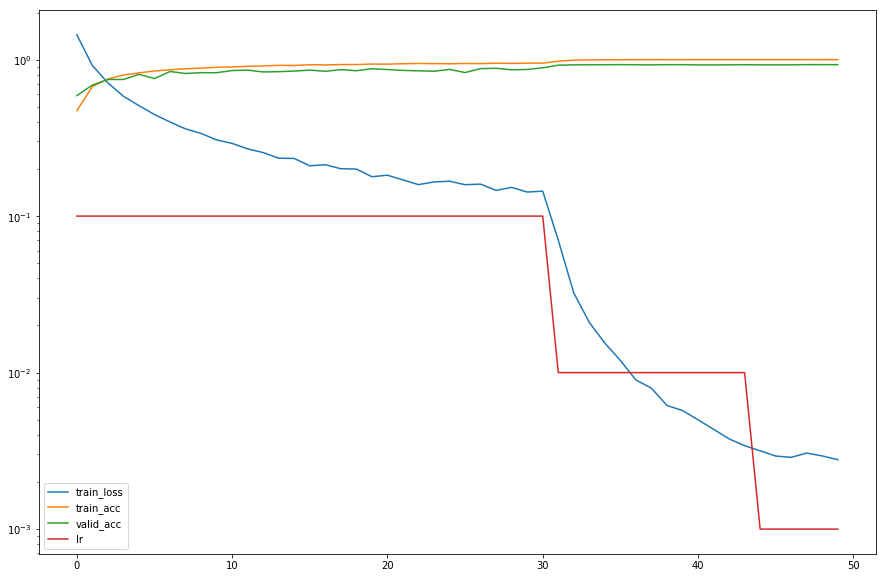

In [24]:
for f in df['filename'].values:
    print(f)
    dft = pd.read_csv(folder+"/"+f)
    
    plt.figure(figsize=(15,10))
    plt.plot(dft)
    plt.legend(dft.columns)    
    plt.show()
    
    plt.figure(figsize=(15,10))
    plt.semilogy(dft)
    plt.legend(dft.columns)    
    plt.show()